In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


3
cat


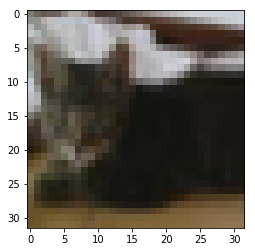

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
i = 9
#for i in range(20):
plt.imshow(train_features[i])
out_images = np.array(train_labels)
print(out_images[(i)].item())
#print(type(train_labels[0]))
print(class_names[out_images[(i)].item()])

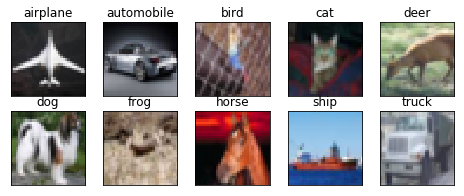

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [14]:
# Define the model
model = Sequential()

# Convolution layer - 1
model.add(Convolution2D(10,(3, 3), padding="same", input_shape=(32, 32, 3)))  #  RF : 3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16,(3, 3), padding='same'))  # RF : 5
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32,(3, 3), padding='same'))   # RF : 7
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64,(3, 3), padding='same'))  # RF : 9
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(128,(3, 3), padding='same'))  #  RF : 11
model.add(BatchNormalization())
model.add(Activation('relu'))

# Transition Layer - 1
model.add(Convolution2D(10,(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   #   RF : 22  image-size = 16*3*3
model.add(Dropout(0.10))


# Convolution layer - 2
model.add(Convolution2D(10, 3, 3))  #  RF : 24  image-size = 14
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3))  # RF : 26   image-size = 12
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3))  # RF : 28   image-size = 10
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3))  # RF : 30  image-size = 8*3*3
model.add(BatchNormalization())
model.add(Activation('relu'))

# Transition Layer - 2
model.add(Convolution2D(10, 8, 8))

model.add(Flatten())
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (8, 8))`


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 10)        280       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 10)        40        
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 10)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 16)        1456      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        4640      
__________

Epoch 1/90
  1/390 [..............................] - ETA: 47s - loss: 0.1634 - acc: 0.9453

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=90)`
  if sys.path[0] == '':


390/390 [==============================] - 38s 96ms/step - loss: 0.1080 - acc: 0.9609 - val_loss: 1.3232 - val_acc: 0.7352
Epoch 2/90
390/390 [==============================] - 38s 96ms/step - loss: 0.1094 - acc: 0.9601 - val_loss: 1.2645 - val_acc: 0.7435
Epoch 3/90
390/390 [==============================] - 38s 96ms/step - loss: 0.1066 - acc: 0.9614 - val_loss: 1.1869 - val_acc: 0.7521
Epoch 4/90
390/390 [==============================] - 38s 96ms/step - loss: 0.1008 - acc: 0.9638 - val_loss: 1.3267 - val_acc: 0.7398
Epoch 5/90
390/390 [==============================] - 38s 97ms/step - loss: 0.1091 - acc: 0.9604 - val_loss: 1.2460 - val_acc: 0.7481
Epoch 6/90
390/390 [==============================] - 38s 96ms/step - loss: 0.0999 - acc: 0.9640 - val_loss: 1.2666 - val_acc: 0.7485
Epoch 7/90
390/390 [==============================] - 38s 96ms/step - loss: 0.1052 - acc: 0.9621 - val_loss: 1.2436 - val_acc: 0.7494
Epoch 8/90
390/390 [==============================] - 38s 96ms/step - los

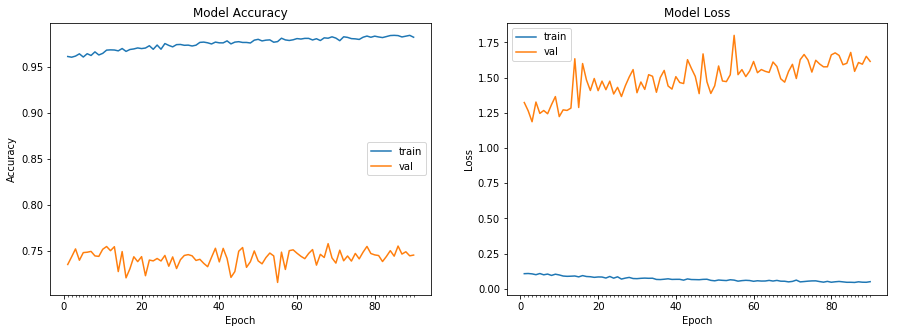

Accuracy on test data is: 74.54


In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 90, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))